# "Product Recommendation System Using Market Basket Analysis for Retail Strategy"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [4]:
df=pd.read_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\Product recommendation system\archive\online_retail_II.csv",encoding='ISO-8859-1')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Step 4: Get info about the data
df.info()

# Step 5: Check for missing values
df.isnull().sum()

# Step 6: Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Data Cleaning and Preproceesing


In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
# Step 1: Drop rows with missing Customer ID
df = df.dropna(subset=['Customer ID'])

# Step 2: Remove canceled orders
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Step 3: Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 4: Remove negative or zero Quantity and Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Step 5: Reset index
df = df.reset_index(drop=True)

# View cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805549 entries, 0 to 805548
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 49.2+ MB


EDA And Visuals


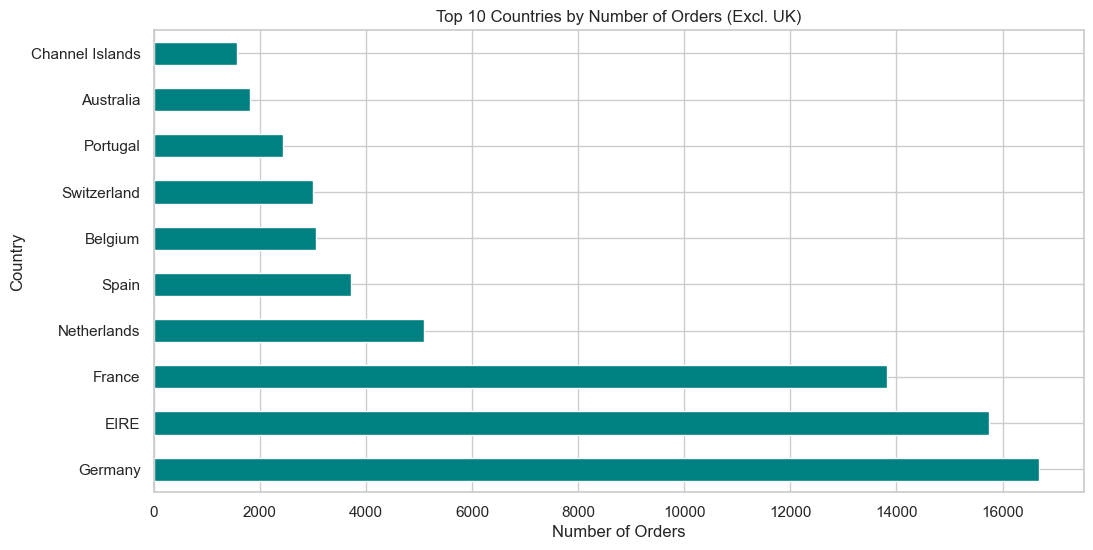

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Top Countries by number of orders (excluding UK if it's dominant)
top_countries = df['Country'].value_counts().drop('United Kingdom', errors='ignore').head(10)
top_countries.plot(kind='barh', color='teal')
plt.title('Top 10 Countries by Number of Orders (Excl. UK)')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.show()


In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


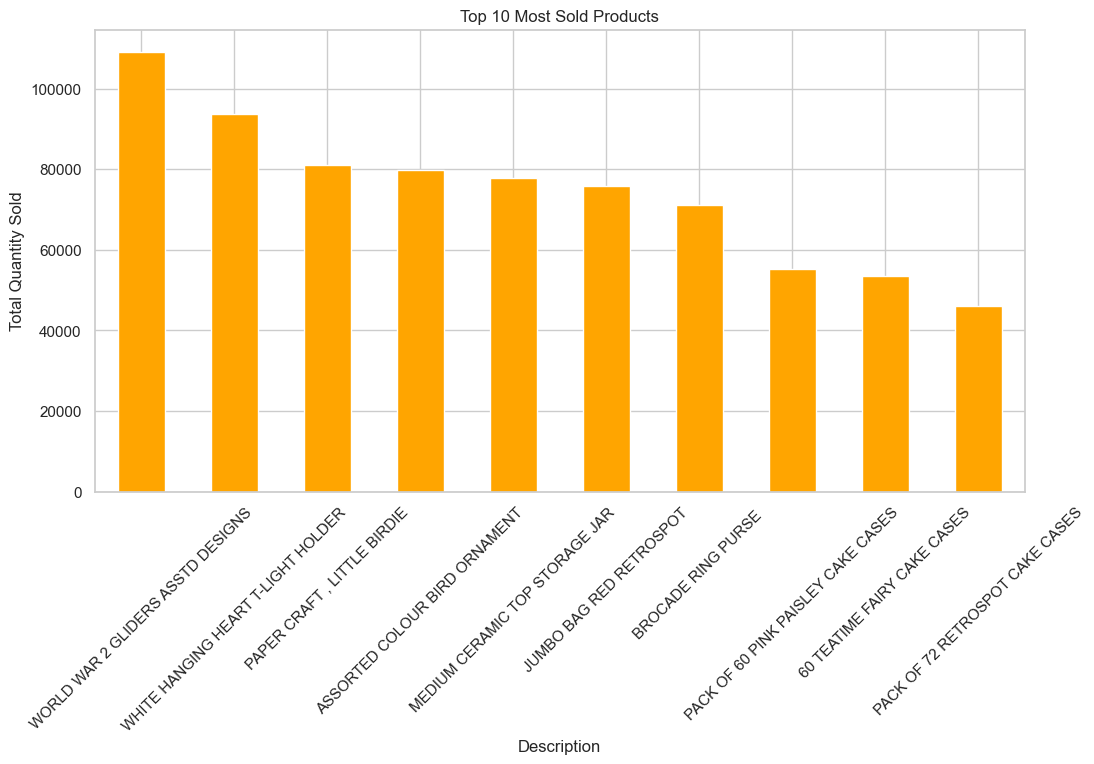

In [11]:
# 2. Most Sold Products
plt.figure(figsize=(12, 6))
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Most Sold Products')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


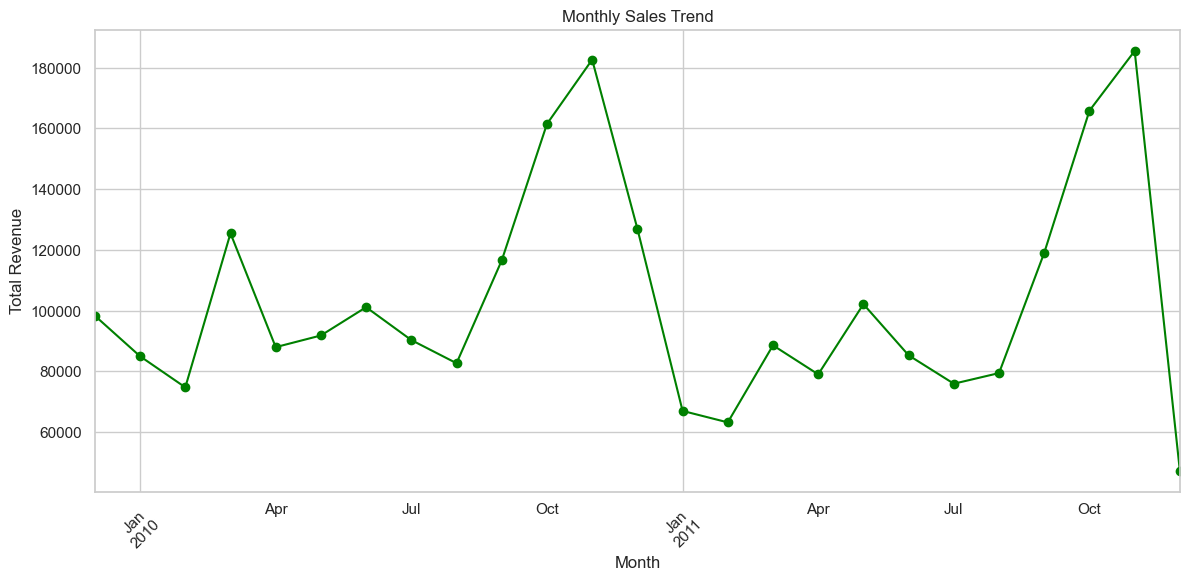

In [12]:
# 3. Monthly Sales Trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Price'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


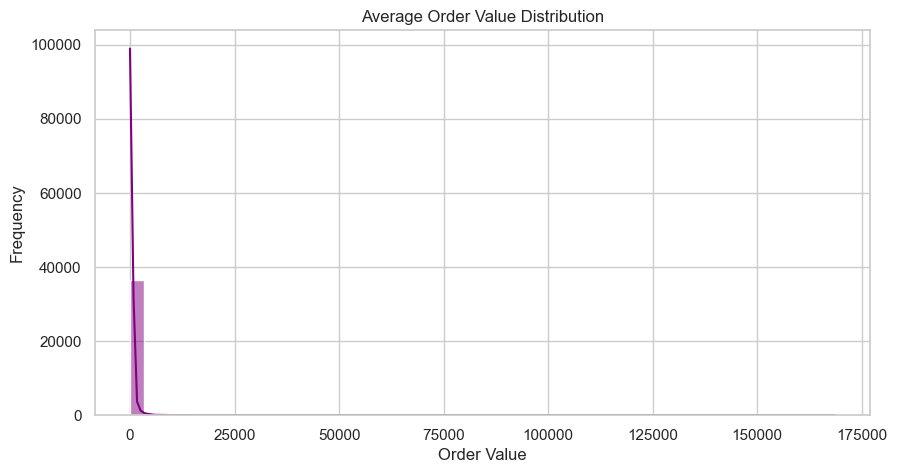

In [13]:
# 4. Average Order Value
df['Total'] = df['Quantity'] * df['Price']
order_value = df.groupby('Invoice')['Total'].sum()
plt.figure(figsize=(10, 5))
sns.histplot(order_value, bins=50, kde=True, color='purple')
plt.title('Average Order Value Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805549 entries, 0 to 805548
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  object        
 8   Month        805549 non-null  period[M]     
 9   Total        805549 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 61.5+ MB


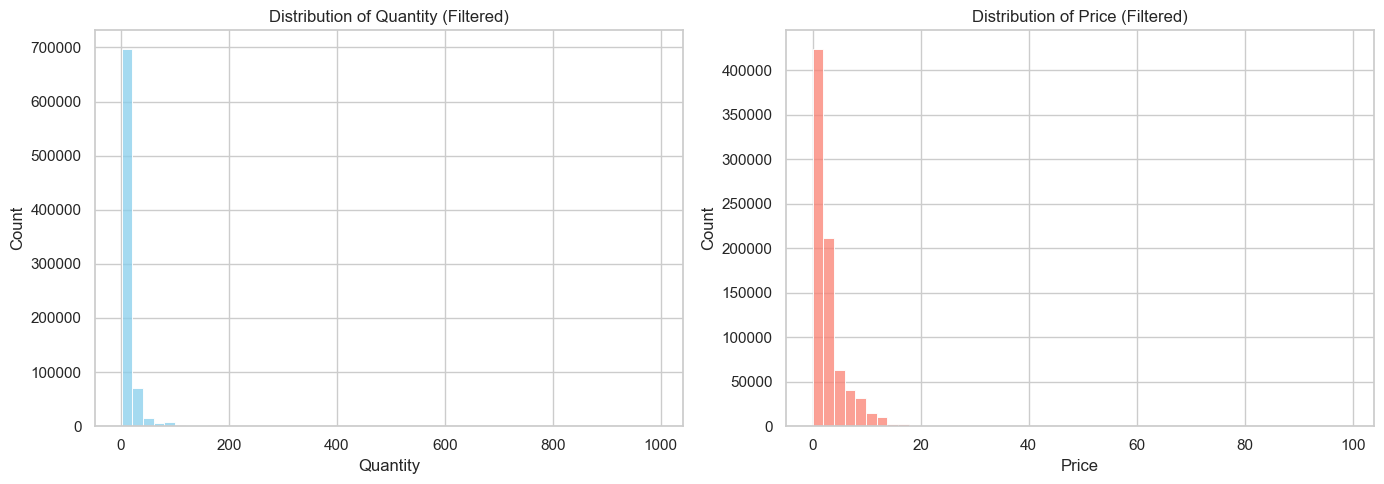

In [15]:
# 5. Distribution of Quantity & Price
# Filter out extreme outliers for Quantity and Price
filtered_df = df[(df['Quantity'] > 0) & (df['Quantity'] < 1000) & (df['Price'] > 0) & (df['Price'] < 100)]

# Plot again
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(filtered_df['Quantity'], bins=50, color='skyblue', ax=axs[0])
axs[0].set_title('Distribution of Quantity (Filtered)')
axs[0].set_xlabel('Quantity')

sns.histplot(filtered_df['Price'], bins=50, color='salmon', ax=axs[1])
axs[1].set_title('Distribution of Price (Filtered)')
axs[1].set_xlabel('Price')

plt.tight_layout()
plt.show()


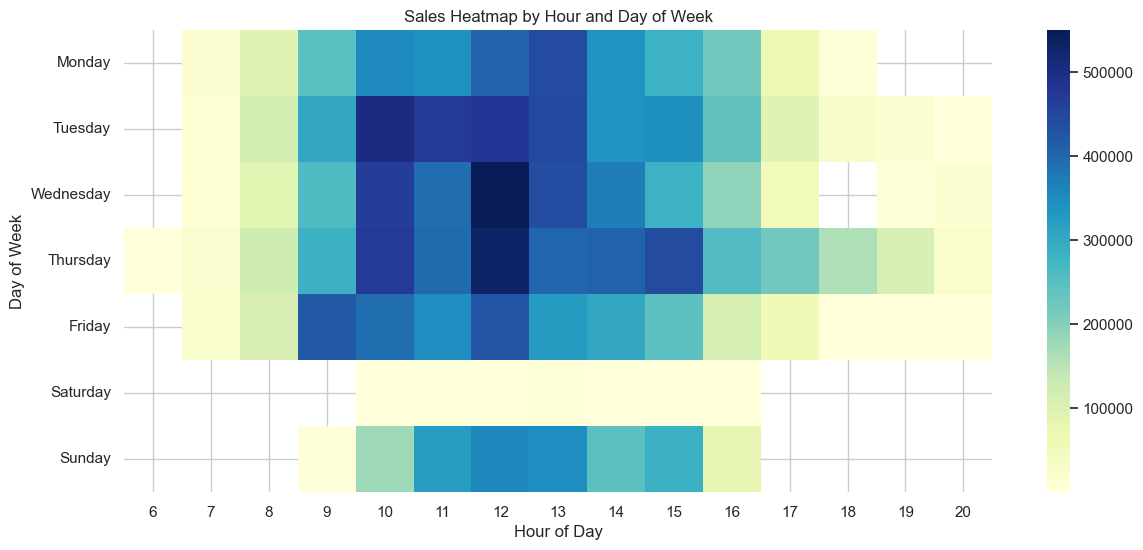

In [16]:
# 6. Sales Heatmap by Hour and Day
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

heatmap_data = df.groupby(['DayOfWeek', 'Hour'])['Total'].sum().unstack()
# Ensure the days are ordered correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Sales Heatmap by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


Market Basket Analysis using the Apriori algorithm to find association rules

prepare data for Apriori algo


In [17]:
import pandas as pd

# Step 1: Clean and filter the data
df = df[df['Quantity'] > 0]
df = df[df['Invoice'].str.startswith('C') == False]  # Remove canceled invoices

# Drop rows with missing Customer ID or Description
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Strip whitespace from descriptions
df['Description'] = df['Description'].str.strip()

# Step 2: Create basket matrix (UK market only for now)
basket = (
    df[df['Country'] == "United Kingdom"]
    .groupby(['Invoice', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)

# Step 3: Convert quantities to binary (1 if purchased, 0 if not)
basket = basket.map(lambda x: 1 if x > 0 else 0)

basket.head()


Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


apply apriori algorithm


In [18]:
# Keep top 100 most common items
item_counts = basket.sum().sort_values(ascending=False)
top_items = item_counts.head(100).index
basket_filtered = basket[top_items]
basket_sampled = basket.sample(frac=0.1, random_state=42)  # use 10% of data


In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Apply Apriori algorithm
frequent_itemsets = apriori(basket_filtered, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.head()



c:\Users\Saurav Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.140157,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.085150,(REGENCY CAKESTAND 3 TIER)
2,0.074655,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.071286,(JUMBO BAG RED RETROSPOT)
4,0.057869,(PARTY BUNTING)


Generate Association Rules

In [20]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort by lift to get strongest rules first
rules = rules.sort_values(by='lift', ascending=False)

# Display top rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
217,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...",(GREEN REGENCY TEACUP AND SAUCER),0.011210,0.762677,30.894886
220,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...",0.011210,0.454106,30.894886
219,(ROSES REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",0.011210,0.408696,30.530202
218,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",(ROSES REGENCY TEACUP AND SAUCER),0.011210,0.837416,30.530202
22,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.019618,0.715217,28.972351
23,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.019618,0.794686,28.972351
47,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.018127,0.662309,22.214519
46,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.018127,0.608000,22.214519
282,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",(LUNCH BAG PINK POLKADOT),0.010316,0.608084,20.153911
283,(LUNCH BAG PINK POLKADOT),"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",0.010316,0.341897,20.153911


Visualsations

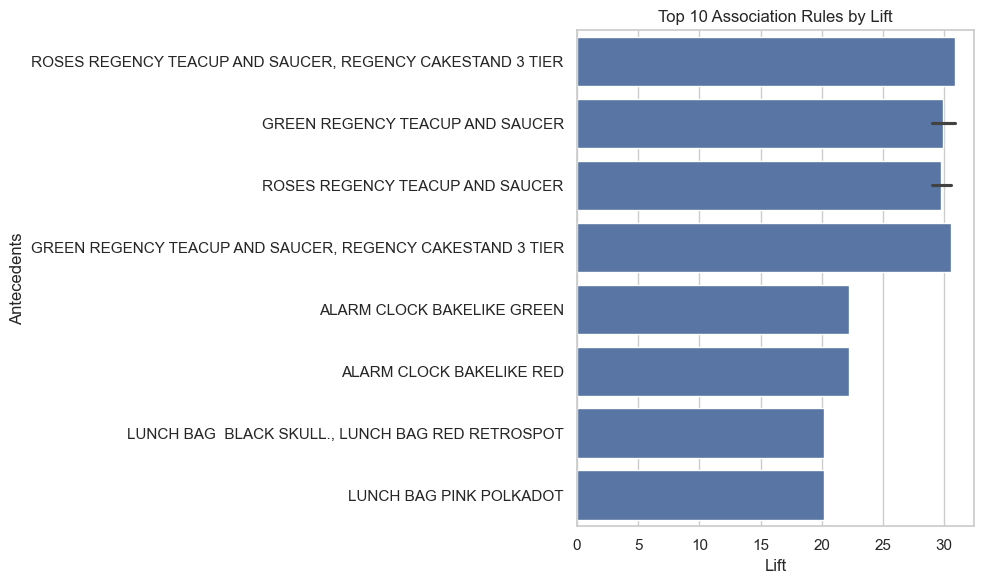

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert frozensets to strings for plotting
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Plot top 10 rules by lift
top_rules = rules.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_rules, x='lift', y='antecedents')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.tight_layout()
plt.show()


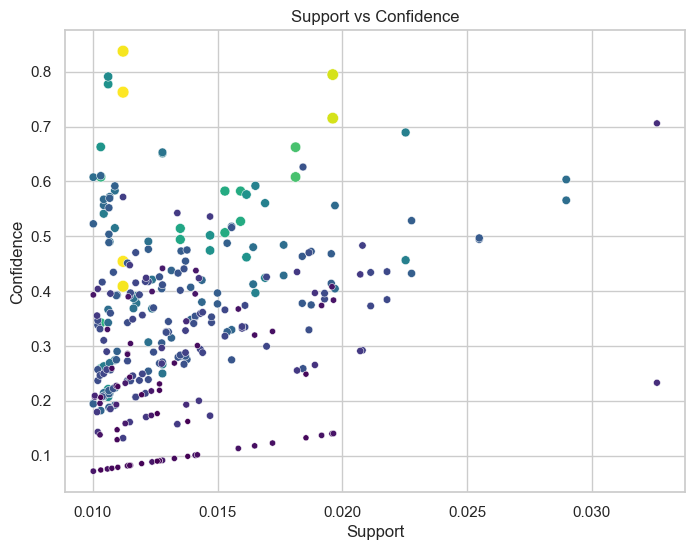

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', legend=False)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()
